In [1]:
import numpy as np
from matplotlib import pyplot as plt

### `RectBoundary`

Init method:
```python
RectBoundary(xbound=None, ybound=None)
```

Attr:
+ `xbound`
+ `ybound`
+ `bound`

In [2]:
from lines import RectBoundary

r = RectBoundary(xbound=[0, 1])
print(f'The rectangle bound: {r}')
print(f'r.bound = {r.bound}')

The rectangle bound: RectBound object:             
X-axis range:[0, 1];
Y-axis range:None.
r.bound = {'xbound': [0, 1], 'ybound': None}


### `TwoPointLines`

Init method:
```python
TwoPointLines(*args, line_axis=0, pstyle=True)
```

Attr:
+ `lc`: line counts
+ `lx`: line representing axis
+ `xdata`: A 2-by-M array(where the $M$ equals to `lc`), 
    each column is the format of $(x_1, x_2)$, where the two edgepoints are
    $(x_1, y_1)$ and $(x_2, y_2)$
+ `ydata`: Also like `xdata`

Line attrs:
 lc: 4; lx: 0
 xdata: 
[[1 2 1 1]
 [2 1 2 2]]


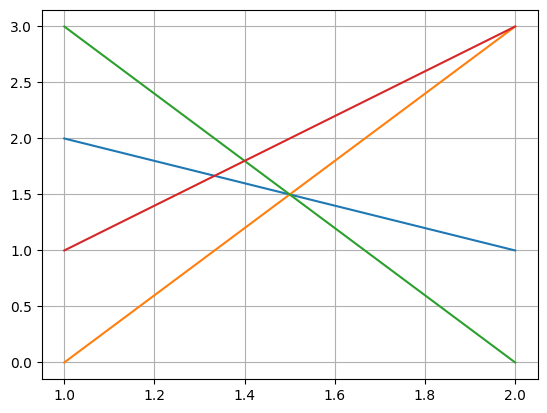

In [7]:
# Unittest `TwoPointLines` 
# `Init` process and method `plot`
from lines import TwoPointLines

# Representing 4-line points:
# (x_1^{(1)}, y_1^{(1)}, x_2^{(1)}, y_2^{(1)}) = (1, 2, 2, 1)
# (x_1^{(2)}, y_1^{(2)}, x_2^{(2)}, y_2^{(2)}) = (2, 3, 1, 0)
# (x_1^{(3)}, y_1^{(3)}, x_2^{(3)}, y_2^{(3)}) = (1, 3, 2, 0)
# (x_1^{(4)}, y_1^{(4)}, x_2^{(4)}, y_2^{(4)}) = (1, 1, 2, 3)
lines = TwoPointLines([[1, 2], [2, 3], [1, 3], [1, 1]], \
    [[2, 1], [1, 0], [2, 0], [2, 3]], line_axis=0) # pstyle=True
lines.plot(); plt.grid()
print(f'Line attrs:\n lc: {lines.lc}; lx: {lines.lx}\n xdata: \n{lines.xdata}')


Another representation below:

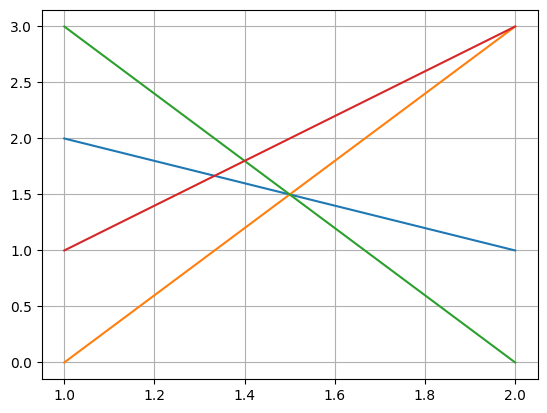

In [8]:
lines = TwoPointLines([[1, 2, 2, 1], [2, 3, 1, 0], [1, 3, 2, 0], [1, 1, 2, 3]]) 
lines.plot(); plt.grid()

Or, we could use the projection format, and set `pstyle=False`.
Also, we could slice it.

TwoPoints line with 2 counts


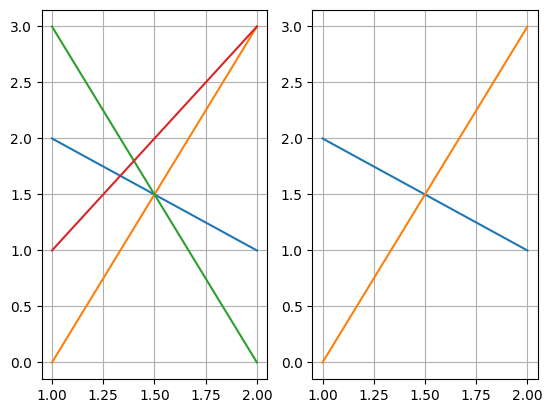

In [18]:
_, axs = plt.subplots(1, 2)

newlines = TwoPointLines(lines.xdata, lines.ydata, line_axis=1, pstyle=False)
newlines.plot(ax=axs[0]); axs[0].grid()

# Select top 2 lines
newlines = newlines[:2] 
newlines.plot(ax=axs[1]); axs[1].grid()

print(newlines)

### `InterceptLines`

Init method:
```python
TwoPointLines(*args, line_axis=0, xbound=None, ybound=None, bdobj=None, select_indices=None)
```

Attr:
> `lc`, `lx`, `xdata`, `ydata` same as above
+ `k`: slope parameters, a 1-by-M array
+ `b`: intercept parameters


In [19]:
# Unittest `InterceptLines`
# Initialization process
from lines import InterceptLines

l = InterceptLines([[2, 1, 3], [4, 0, 2]], line_axis=1)
print(l)

Intercept-parametered lines
 (k,b) pairs as below[with top 3 lines]:
(2 4), (1 0), (3 2)


In [28]:
l.k.shape

(1, 3)

RectBound object:             
X-axis range:[0, 4];
Y-axis range:None.


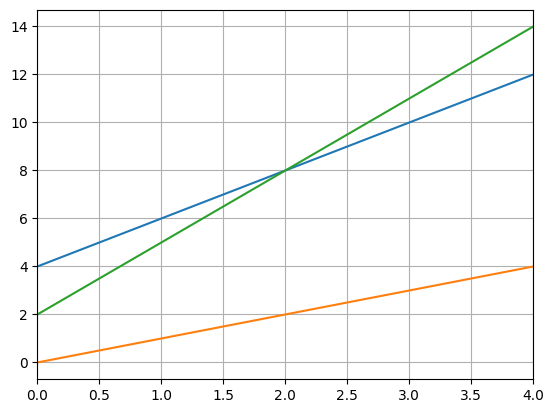

In [27]:
# Unittest `InterceptLines`
# bound & plot
l.set_pts(bdobj=RectBoundary(xbound=[0, 4]))
l.plot(pre_style=False); plt.xlim([0, 4]); plt.grid()
print(l.bound)

### `RhoThetaLines`

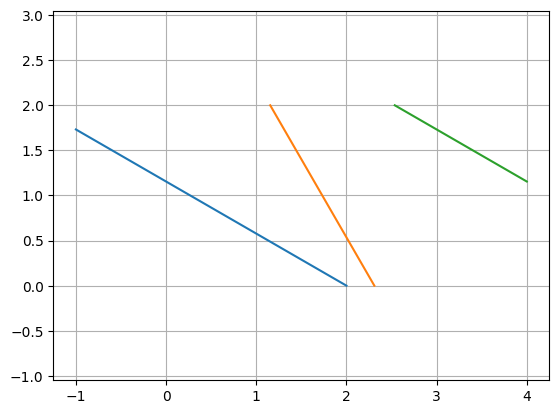

In [30]:
# Unittest of `RhoThetaLines`
# Initialization process
from lines import RhoThetaLines

pi=np.pi
# rtlines = RhoThetaLines([1, 2, 3], [pi/3, pi/6, pi/3])
# rtlines = RhoThetaLines([[1, 2, 3], [pi/3, pi/6, pi/3]], line_axis=1)
# rtlines = RhoThetaLines([[1, pi/3], [2, pi/6], [3, pi/3]])
rtlines = RhoThetaLines([1, 2, 3], [60, 30, 60], is_deg=True)
rtlines = RhoThetaLines([1, 2, 3], [pi/3, pi/6, pi/3], xbound = [-1, 4], ybound = [0, 2])

rtlines.plot()

If you want to use a deeper API, you can use:
`gen_pts_by_boundary`, 

which output 3 values: `xdata`, `ydata`, `whether_exceed`

In [54]:
x, y, ef = rtlines.gen_pts_by_boundary(xbound=[-1, 2], ybound=[0, 2], attach=False)
# # plt.plot(x, y)
print(x, y, ef, sep='\n')

[[-1.          1.15470054  2.53589838]
 [ 2.          2.          2.        ]]
[[1.73205081 2.         2.        ]
 [0.         0.53589838 2.30940108]]
[False False  True]


You should notice `ef=[False False  True]`, which means that the **third** line doesn't exist in the presvering box.

(-1.1767949192431124,
 2.712693304105358,
 -0.11547005383792515,
 2.424871130596428)

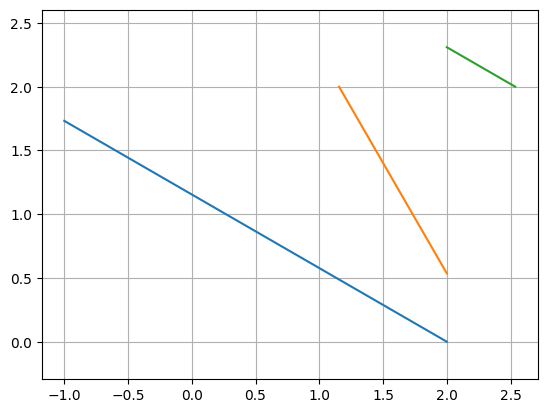

In [57]:
plt.plot(x, y)
# plt.grid(); plt.axis('equal')
# plt.xlim([0, 3]); plt.ylim([0, 3])
ax = plt.gca()
ax.grid()
ax.set_xlim([0, 3]); ax.set_ylim([0, 3]); ax.axis('equal')
# ax.xlim([0, 3]); ax.ylim([0, 3])

### Transferring
You can use method:`trans` to convert one format to another

In [40]:
# Convert to edgepoint format
xpts, ypts = rtlines.tran_to(TwoPointLines, return_cls=False)
print(f"The edge points projection are: \nX-projection:{xpts}\nY-projection:{ypts}")

The edge points projection are: 
X-projection:[[-1.          1.15470054  2.53589838]
 [ 2.          2.30940108  4.        ]]
Y-projection:[[1.73205081 2.         2.        ]
 [0.         0.         1.15470054]]


In [45]:
# Convert to intercept format
k, b= rtlines.tran_to(InterceptLines, return_cls=False)
print(k, b)

[-0.57735027 -1.73205081 -0.57735027] [1.15470054 4.         3.46410162]


Also, we can convert `TwoPointLines` object to anothere parametric line object.

In [50]:
# Unittest `trans`
# from two-points format to $(\rho, \theta)$ paras
# ptsl = TwoPointLines([2, 0, -1.464, 2])
ptsl = TwoPointLines([6, 0, 2.535, 2])
ptsl.tran_to(RhoThetaLines)

(-2.9994165764856398, 1.0473098274654955)

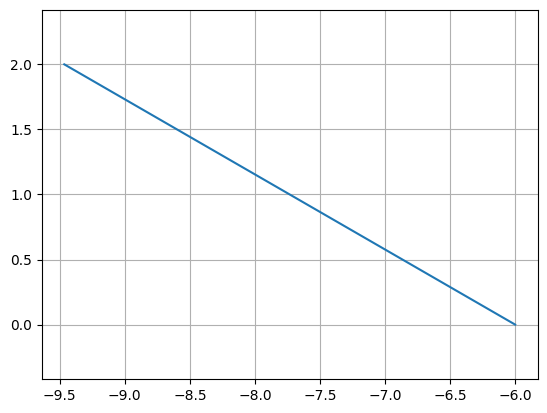

In [51]:
m = ptsl.tran_to(RhoThetaLines, return_cls=True)
m.plot(ybound=[0, 2])

# Plot machinism introduction

Point display

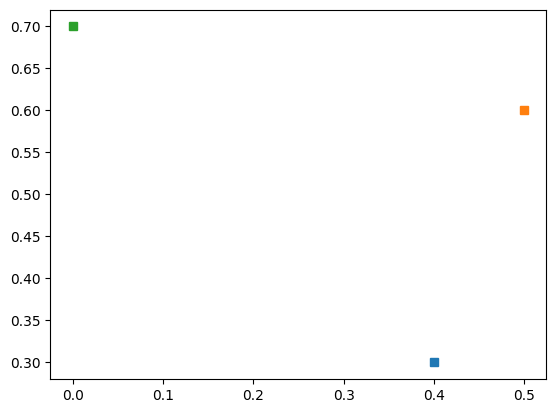

In [52]:
plt.plot(*np.array([.4, .3, .5, .6, .7]), marker='s')

In [ ]:
def con_sort(ldata, small_v=None, large_v=None, small_ind=0, large_ind=1):
    _is_ascend = ldata[large_ind]>ldata[small_ind]
    ldata = np.where(_is_ascend, ldata, np.flipud(ldata))
    if small_v is not None and large_v is not None:
        varray = np.vstack((np.where(_is_ascend, small_v, large_v), np.where(_is_ascend, large_v, small_v)))
        return _is_ascend, ldata, varray
    return _is_ascend, ldata

ta = np.array([[1, 3], [2, 5], [4, 2]]).T
print(ta)
whether_reverse = ta[1]>ta[0]
con_sort(ta, 0, 2)